In [1]:
setwd('/import/GSE213982_fel/')

In [3]:
library(Seurat)
options(stringsAsFactors = FALSE)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [4]:
sce = readRDS('/import/GSE213982_fel/final.rds')

In [31]:
a = grep('ATP',rownames(as.matrix(sce@assays$RNA@counts)),value = TRUE)

Warning message in asMethod(object):
"sparse->dense coercion: allocating vector of size 40.2 GiB"


In [32]:
a

[1] "ATP13A2"      "ATP5IF1"      "ATP6V0B"      "ATPAF1"       "ATP5PB"      
  [6] "ATP1A1"       "ATP1A1-AS1"   "ATP8B2"       "ATP1A2"       "ATP1A4"      
 [11] "ATP1B1"       "ATP6V1G3"     "ATP2B4"       "ATP6V1C2"     "ATP6V1E2"    
 [16] "ATP6V1B1"     "ATP5MC3"      "ATP2B2"       "ATP2B2-IT1"   "ATP2B2-IT2"  
 [21] "ATP6V1A"      "ATP2C1"       "ATP1B3"       "ATP1B3-AS1"   "ATP11B"      
 [26] "ATP13A5"      "ATP13A5-AS1"  "ATP13A4"      "ATP13A4-AS1"  "ATP13A3"     
 [31] "ATP5ME"       "ATP8A1"       "ATP10D"       "ATPSCKMT"     "ATP6AP1L"    
 [36] "ATP10B"       "ATP6V0E1"     "ATP6V1G2"     "ATP5MF"       "ATP6V1F"     
 [41] "ATP6V1FNB"    "ATP6V0A4"     "ATP6V0E2-AS1" "ATP6V0E2"     "ATP6V1B2"    
 [46] "ATP6V1H"      "ATP6V0D2"     "ATP6V1C1"     "ATP6V1G1"     "ATP5F1C"     
 [51] "IATPR"        "ATP5MD"       "ATP5MG"       "ATP5MC2"      "ATP5F1B"     
 [56] "ATP23"        "ATP2B1"       "ATP2B1-AS1"   "ATP2A2"       "ATP6V0A2"    
 [61] "ATP12A"       "ATP8A2"       "ATP7B"        "ATP11AUN"     "ATP11A"      
 [66] "ATP11A-AS1"   "ATP4B"        "ATP6V1D"      "ATP5MPL"      "ATP10A"      
 [71] "ATP8B4"       "ATP6V0C"      "ATP2A1"       "ATP2A1-AS1"   "ATP6V0D1"    
 [76] "ATP2C2"       "ATP2C2-AS1"   "ATP2A3"       "ATP1B2"       "ATPAF2"      
 [81] "ATP6V0A1"     "ATP5MC1"      "ATP5PD"       "ATP5F1A"      "ATP8B1"      
 [86] "ATP9B"        "ATP5F1D"      "ATP8B3"       "ATP13A1"      "ATP4A"       
 [91] "ATP1A3"       "ATP9A"        "ATP5F1E"      "ATP5PF"       "ATP5PO"      
 [96] "ATP6V1E1"     "ATP5MGL"      "ATP6AP2"      "ATP7A"        "ATP1B4"      
[101] "ATP11C"       "ATP2B3"       "ATP6AP1"

In [33]:
WNT_features <- list(a)

In [34]:
sce <- AddModuleScore(sce,
                          features = WNT_features,
                          ctrl = 100,
                          name = "WNT_features")
head(sce@meta.data)
#这里就得到了基因集评分结果，但是注意列名为 WNT_features1

,orig.ident,nCount_RNA,nFeature_RNA,sample,barcodeid,celltype,celltype2,nFeaturess_RNA,nFeaturess_RNA_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,seurat_clusters,percent.mt,group,Condition,WNT_Score,WNT_features1
,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
F1.AAACCCACACCTCTGT-1.Mic.Mic1,0,2848,1869,F1,AAACCCACACCTCTGT-1,Mic,Mic1,1869,1869,2848,0,0,25,25,0,F,Case,-0.05120865,0.001878895
F1.AAACCCATCGGCATTA-1.ExN.ExN7,0,4215,2364,F1,AAACCCATCGGCATTA-1,ExN,ExN7,2364,2364,4215,0,0,7,7,0,F,Case,0.07041693,0.214281391
F1.AAACGAATCAGGGTAG-1.InN.InN8_Mix,0,10982,3991,F1,AAACGAATCAGGGTAG-1,InN,InN8_Mix,3991,3991,10982,0,0,22,22,0,F,Case,-0.03018659,-0.010086997
F1.AAACGAATCGGAATGG-1.Oli.Oli3,0,2499,1566,F1,AAACGAATCGGAATGG-1,Oli,Oli3,1566,1566,2499,0,0,4,4,0,F,Case,-0.04475638,-0.049216600
F1.AAACGCTAGGACTTCT-1.Ast.Ast1,0,713,589,F1,AAACGCTAGGACTTCT-1,Ast,Ast1,589,589,713,0,0,6,6,0,F,Case,-0.06779149,-0.009323586
F1.AAACGCTGTGACTAAA-1.ExN.ExN17,0,95773,10044,F1,AAACGCTGTGACTAAA-1,ExN,ExN17,10044,10044,95773,0,0,3,3,0,F,Case,-0.09177877,-0.068299913


In [36]:
dim(sce@meta.data)

[1] 160711     19

In [60]:
colnames(sce@meta.data)[19] <- 'WNT_Score'

Idents(sce) = 'celltype'

Neo = subset(sce,idents = c('InN','ExN'))

Neo$tp = paste0(Neo$group,'_',Neo$celltype,'_',Neo$Condition)

DefaultAssay(Neo) = 'RNA'



In [68]:
Idents(Neo) = 'group'

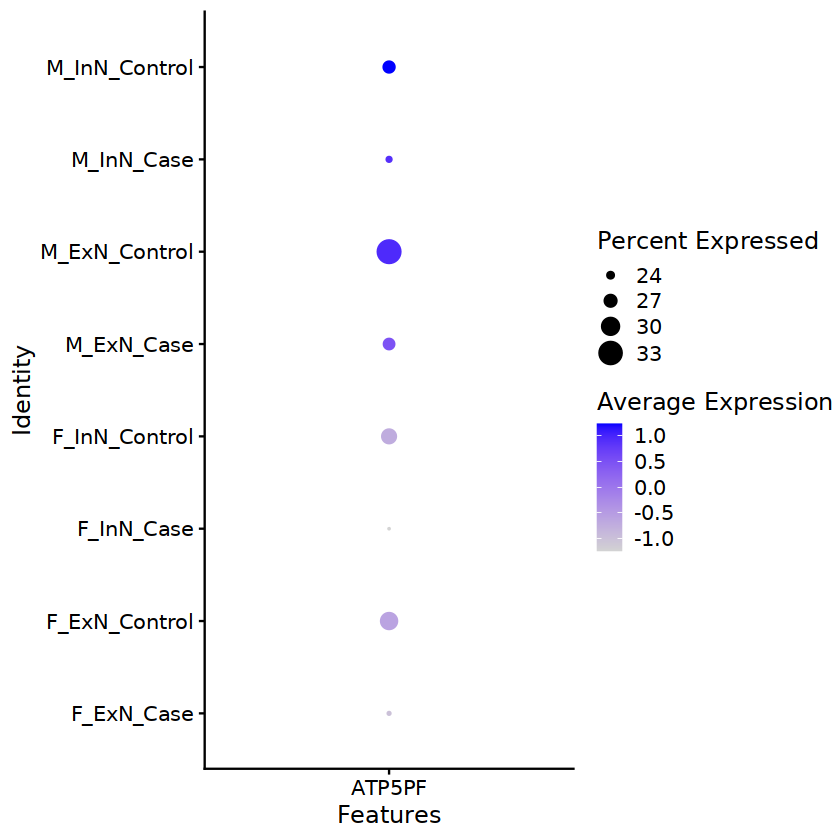

In [71]:
DotPlot(Neo,features = 'ATP5PF',
       group.by = "tp")

In [65]:
table(Neo$tp)


   F_ExN_Case F_ExN_Control    F_InN_Case F_InN_Control    M_ExN_Case 
        20432         12968          6200          4537         26482 
M_ExN_Control    M_InN_Case M_InN_Control 
        17576          9912          7687 

In [7]:
library(msigdbr)

Warning message:
"package 'msigdbr' was built under R version 4.2.3"


In [8]:
human_KEGG = msigdbr(species = "Homo sapiens",
                     category = "H") %>% 
dplyr::select(gs_name,gene_symbol)#这里可以选择gene symbol，也可以选择ID

In [9]:
human_KEGG_Set = human_KEGG %>% split(x = .$gene_symbol, f = .$gs_name)#基因集是list

In [10]:
  #随意选择其中一条通路，转为list
WNT_features <- list(human_KEGG_Set$HALLMARK_OXIDATIVE_PHOSPHORYLATION)

In [13]:
sce <- AddModuleScore(sce,
                          features = WNT_features,
                          ctrl = 100,
                          name = "WNT_features")
head(sce@meta.data)
#这里就得到了基因集评分结果，但是注意列名为 WNT_features1


,orig.ident,nCount_RNA,nFeature_RNA,sample,barcodeid,celltype,celltype2,nFeaturess_RNA,nFeaturess_RNA_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,seurat_clusters,percent.mt,group,Condition,WNT_features1
,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<chr>,<chr>,<dbl>
F1.AAACCCACACCTCTGT-1.Mic.Mic1,0,2848,1869,F1,AAACCCACACCTCTGT-1,Mic,Mic1,1869,1869,2848,0,0,25,25,0,F,Case,-0.05120865
F1.AAACCCATCGGCATTA-1.ExN.ExN7,0,4215,2364,F1,AAACCCATCGGCATTA-1,ExN,ExN7,2364,2364,4215,0,0,7,7,0,F,Case,0.07041693
F1.AAACGAATCAGGGTAG-1.InN.InN8_Mix,0,10982,3991,F1,AAACGAATCAGGGTAG-1,InN,InN8_Mix,3991,3991,10982,0,0,22,22,0,F,Case,-0.03018659
F1.AAACGAATCGGAATGG-1.Oli.Oli3,0,2499,1566,F1,AAACGAATCGGAATGG-1,Oli,Oli3,1566,1566,2499,0,0,4,4,0,F,Case,-0.04475638
F1.AAACGCTAGGACTTCT-1.Ast.Ast1,0,713,589,F1,AAACGCTAGGACTTCT-1,Ast,Ast1,589,589,713,0,0,6,6,0,F,Case,-0.06779149
F1.AAACGCTGTGACTAAA-1.ExN.ExN17,0,95773,10044,F1,AAACGCTGTGACTAAA-1,ExN,ExN17,10044,10044,95773,0,0,3,3,0,F,Case,-0.09177877


In [ ]:
colnames(sce@meta.data)[18] <- 'WNT_Score'

Idents(sce) = 'celltype'

Neo = subset(sce,idents = c('InN','ExN'))

Neo$tp = paste0(Neo$group,'_',Neo$celltype,'_',Neo$Condition)

DefaultAssay(Neo) = 'RNA'

DotPlot(Neo,features = 'WNT_Score', 
       group.by = "tp")